In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from geopy import point,distance
from math import *
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [167]:
df=pd.read_csv("uber.csv")

In [168]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [169]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [170]:
df=df.drop(["Unnamed: 0","key"],axis=1)

In [171]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [173]:
df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"],errors="coerce")

In [174]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [175]:
df=df.dropna()

In [176]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [177]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,199999.0,11.359892,9.901760,-52.000000,6.000000,8.500000,12.500000,499.000000
pickup_longitude,199999.0,-72.527631,11.437815,-1340.648410,-73.992065,-73.981823,-73.967154,57.418457
pickup_latitude,199999.0,39.935881,7.720558,-74.015515,40.734796,40.752592,40.767158,1644.421482
dropoff_longitude,199999.0,-72.525292,13.117408,-3356.666300,-73.991407,-73.980093,-73.963658,1153.572603
dropoff_latitude,199999.0,39.923890,6.794829,-881.985513,40.733823,40.753042,40.768001,872.697628
passenger_count,199999.0,1.684543,1.385995,0.000000,1.000000,1.000000,2.000000,208.000000


In [178]:
def distance_transform(longitude1,latitude1,longitude2,latitude2):
    distance=[]
    for pos in range(len(longitude1)):
        longi1,lati1,longi2,lati2=map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_longi=longi2-longi1
        dist_lati=lati2-lati1
        a= sin(dist_lati/2)**2+ cos(lati1) * cos(lati2) * sin(dist_longi/2)**2
        c=asin(sqrt(a))*6371
        distance.append(c)
    return distance

In [179]:
df["distance_km"]=distance_transform(df["pickup_longitude"].to_numpy(),df["pickup_latitude"].to_numpy(),df["dropoff_longitude"].to_numpy(),df["dropoff_latitude"].to_numpy())

In [180]:
df=df.assign(pickup_hr=df.pickup_datetime.dt.hour,
            date=df.pickup_datetime.dt.date,
            month=df.pickup_datetime.dt.month,
            year=df.pickup_datetime.dt.year,
            day_of_week=df.pickup_datetime.dt.day_of_week,
            day_name=df.pickup_datetime.dt.day_name())

In [181]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hr,date,month,year,day_of_week,day_name
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,0.841661,19,2015-05-07,5,2015,3,Thursday
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,1.228795,20,2009-07-17,7,2009,4,Friday
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2.518189,21,2009-08-24,8,2009,0,Monday
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,0.830842,8,2009-06-26,6,2009,4,Friday
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2.237725,17,2014-08-28,8,2014,3,Thursday


In [182]:
def find_outliers(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [183]:
outliers = find_outliers(df['fare_amount'])
print('number of outliers:' + str(len(outliers)))
print('max outlier value:' + str(outliers.max()))
print('min outlier value:' + str(outliers.min()))
outliers

number of outliers:17166
max outlier value:499.0
min outlier value:-52.0


6         24.50
30        25.70
34        39.50
39        29.00
48        56.80
          ...  
199976    49.70
199977    43.50
199982    57.33
199985    24.00
199997    30.90
Name: fare_amount, Length: 17166, dtype: float64

In [184]:
outliers=find_outliers(df["passenger_count"])
print("number of outliers = ",len(outliers))
print("maximum outlier value = ",outliers.max())
print("minimum outlier value = ",outliers.min()) 
outliers

number of outliers =  22557
maximum outlier value =  208
minimum outlier value =  4


4         5
6         5
12        5
24        5
29        5
         ..
199958    5
199959    5
199962    4
199969    5
199985    5
Name: passenger_count, Length: 22557, dtype: int64

In [185]:
df.drop(df[df['distance_km'] == 0].index, inplace = True)
df.drop(df[df['distance_km'] > 60].index, inplace = True)
df.drop(df[df['fare_amount'] > 100].index, inplace = True)
df.drop(df[df['fare_amount'] < 0].index, inplace = True)
df.drop(df[df['passenger_count'] > 6].index, inplace = True)

In [186]:
new_df=df.select_dtypes(include="number")

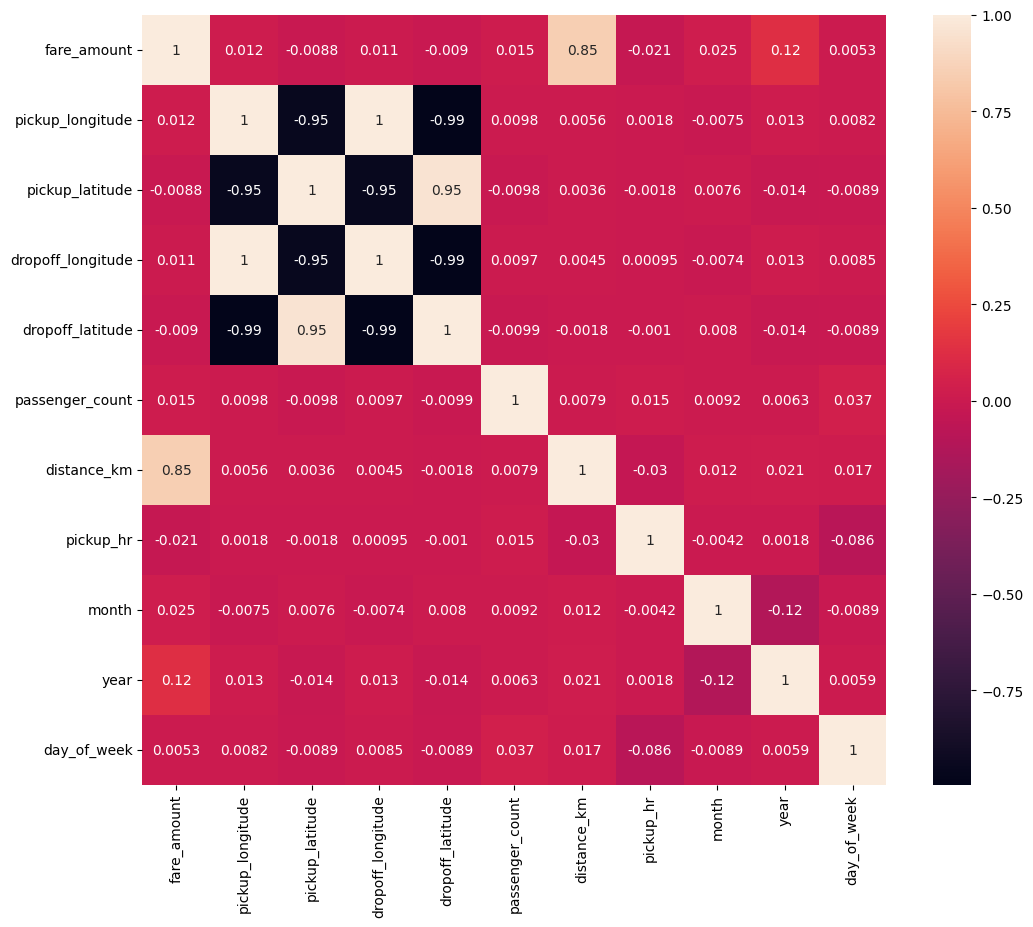

In [187]:
plt.figure(figsize=(12,10))
sns.heatmap(new_df.corr(),annot=True)
plt.show()

In [188]:
x=df[["year","distance_km"]]
y=df[["fare_amount"]]

In [189]:
scaler=StandardScaler()

In [190]:
x=scaler.fit_transform(x)

In [196]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [197]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [198]:
y_pred=model.predict(x_test)

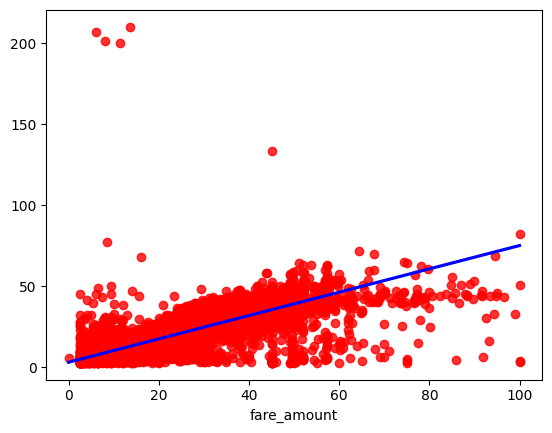

In [199]:
sns.regplot(x=y_test, y=y_pred, color="red", line_kws={"color" : "blue"})
plt.show()

In [207]:
print("Mean absolute error = ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error = ",metrics.mean_squared_error(y_test,y_pred))
print("root Mean squared error = ",sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean absolute error =  2.528210012405571
Mean squared error =  21.65755349064376
root Mean squared error =  1.590034594719741


In [200]:
model=RandomForestRegressor()

In [202]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [203]:
y_pred=model.predict(x_test)

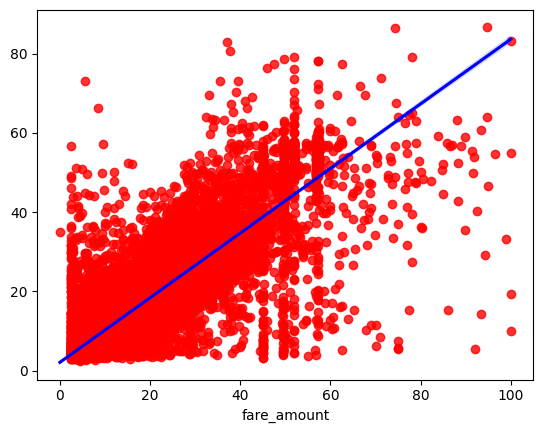

In [206]:
sns.regplot(x=y_test,y=y_pred,color="red",line_kws={"color":"blue"})
plt.show()

In [208]:
print("Mean absolute error = ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error = ",metrics.mean_squared_error(y_test,y_pred))
print("root Mean squared error = ",sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean absolute error =  2.528210012405571
Mean squared error =  21.65755349064376
root Mean squared error =  1.590034594719741
